In [1]:
from visualize import report_const_experiment, report_experiment, report_experiment_summary, plot_sys_behaviour, \
plot_agent_behaviour
%matplotlib inline

# Deterministic case, step down in `p_reff` (power reference) at half of the considered time interval

In [2]:
case_folder = "ps_det_ampl/"

## Baseline exeperiment - constant action applied instead of controller-chosen action

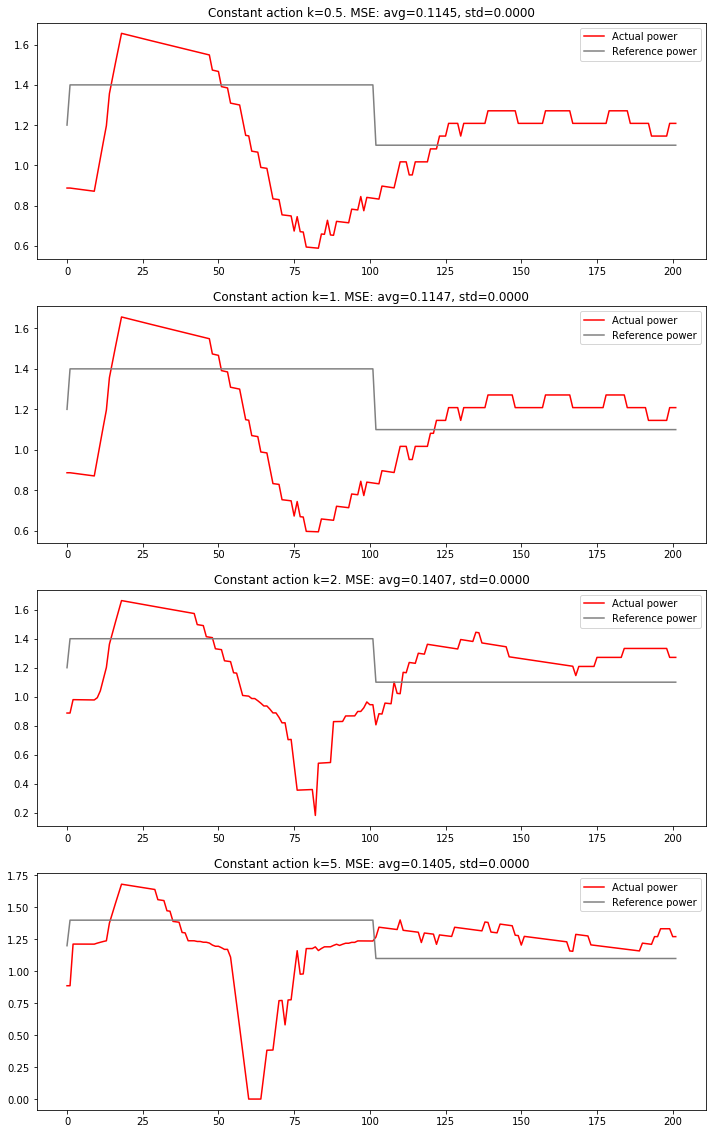

In [3]:
name = case_folder + "constant_action_variation_19-10-2019_21-33"
report_const_experiment(name)

# Control with Q-learning 
## Q-learning hyperparameters chosen on the `p_reff=const` case
## 1. Q-learning considering only actual power as a state variable:

In [4]:
experiments_folder = case_folder + "step_once_not_consid_p_reff_18-09-2019_19-21/"
experiment_name = "Det.PS, Q-learning, Action space variation:"

Last episode performance: 0.13
Time per simulation step in each experiment: [0.17003924 0.17015623 0.16060346 0.15070663 0.1514713 ] s
Mean time per simulation step: 0.161 s, std: 0.0085 s
Total execution time: 16059.537 s for 100000 steps -> 0.161 s per step

Average MSE in exploitation mode 0.1343 +- 0.0029
Average exploitation performance of each agent: 
[0.1344 0.1354 0.1329 0.1383 0.1306]


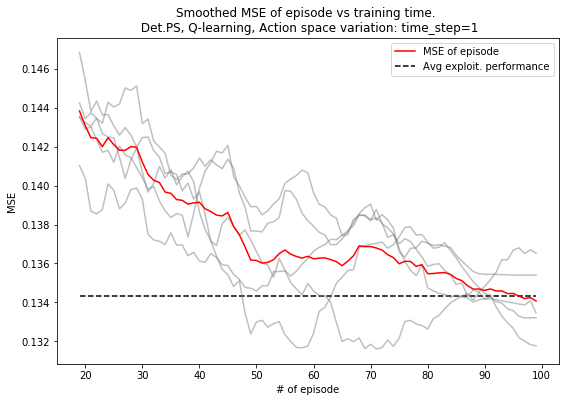

In [5]:
case = "time_step=1"
df_avgsm_mses_1_1, perf_1_1, sig_1_1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

Last episode performance: 0.15
Time per simulation step in each experiment: [0.15799208 0.1613651  0.15916845 0.15995853 0.15843878] s
Mean time per simulation step: 0.159 s, std: 0.0012 s
Total execution time: 3187.692 s for 20000 steps -> 0.159 s per step

Average MSE in exploitation mode 0.1641 +- 0.0136
Average exploitation performance of each agent: 
[0.1615  0.19092 0.1595  0.1558  0.1526 ]


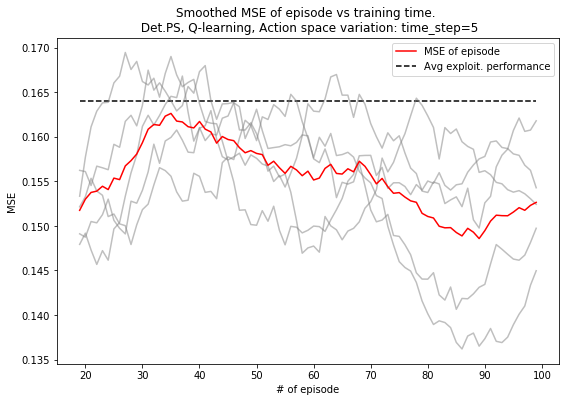

In [6]:
case = "time_step=5"
df_avgsm_mses_1_2, perf_1_2, sig_1_2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

## 2. Q-learning considering both actual and reference power as state variables:

In [7]:
experiments_folder = case_folder + "step_once_consid_p_reff_19-09-2019_04-33/"
experiment_name = "Det.PS, Q-learning, Exploration parameters variation:"

Last episode performance: 0.13
Time per simulation step in each experiment: [0.14963429 0.1501439  0.15214931 0.15140112 0.15079687] s
Mean time per simulation step: 0.151 s, std: 0.0009 s
Total execution time: 15082.510 s for 100000 steps -> 0.151 s per step

Average MSE in exploitation mode 0.1331 +- 0.0012
Average exploitation performance of each agent: 
[0.1328 0.1313 0.1336 0.1336 0.1344]


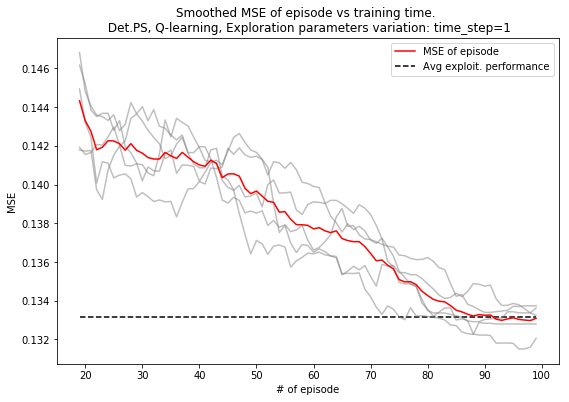

In [8]:
case = "time_step=1"
df_avgsm_mses_2_1, perf_2_1, sig_2_1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False, plot_perf_sigma=0)

Last episode performance: 0.15
Time per simulation step in each experiment: [0.16050322 0.164073   0.1745241  0.19956857 0.2187711 ] s
Mean time per simulation step: 0.183 s, std: 0.0223 s
Total execution time: 3669.760 s for 20000 steps -> 0.183 s per step

Average MSE in exploitation mode 0.1386 +- 0.0258
Average exploitation performance of each agent: 
[0.1759 0.1404 0.148  0.1138 0.1149]


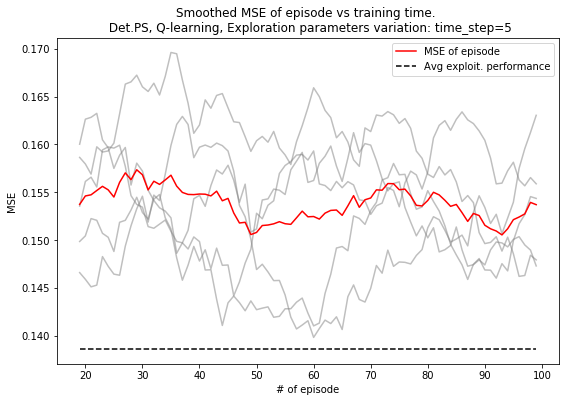

In [9]:
case = "time_step=5"
df_avgsm_mses_2_2, perf_2_2, sig_2_2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

## Summary

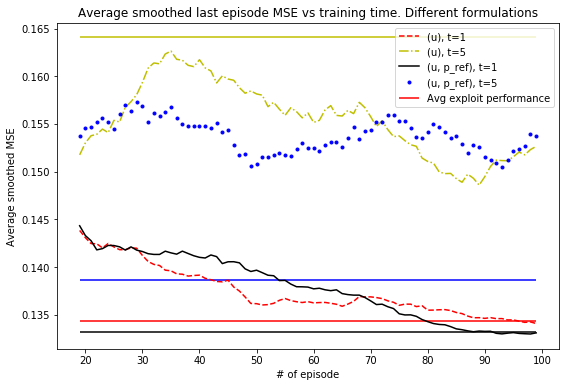

In [10]:
labels = ["(u), t=1", "(u), t=5", "(u, p_ref), t=1", "(u, p_ref), t=5"]
mses = [df_avgsm_mses_1_1, df_avgsm_mses_1_2, df_avgsm_mses_2_1, df_avgsm_mses_2_2]
perfs = [perf_1_1, perf_1_2, perf_2_1, perf_2_2]
sigs = [sig_1_1, sig_1_2, sig_2_1, sig_2_2]
report_experiment_summary("Different formulations", mses, perfs, sigs, labels, 0)

### Modest training is observed - when time_step=1s. 
### When time_step=5 - there is no strict evidences that agent trains. It can be explained by smaller number of steps available for training.